# Practica 1 APC: Graduate Admission 2
## Predicting admission from important parameters

[URL Database Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions)

- #### Bruno Moya Ruiz - 1568176
- #### Marc Garrofé Urrutia - 1565644
- #### Martí Simon Rojas - 1568180

# Apartat (C): Analitzant Dades
En aquest apartat analitzarem la nostra base de dades. Volem primer separar el input (X) del output (Y). En el nostre cas tenim 9 variables, de les quals la ultima es el nostre output, es a dir el resultat que volem obtenir del nostre model.

In [22]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('data/Admission_Predict_Ver1.1.csv')
dataset = dataset.drop(['Serial No.'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
data = dataset.values

x = data[:, :7] # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
y = data[:, 7]
index = dataset.columns[:8]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (500, 8)
Dimensionalitat de les entrades X (500, 7)
Dimensionalitat de l'atribut Y (500,)


D'aqui veiem que la nostra base de dades presenta 500 elements. Ara mirarem si presenta valors no existents, es a dir que el seu valor sigui NaN. Aquests valors poden fer variar el resultat del nostre model i és important tenir-los en compte.

In [23]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Podem observar com el nostre dataset no presenta cap valor NaN.

In [24]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


GRE Score  TOEFL Score  University Rating   SOP  LOR   CGPA  Research  \
0        337          118                  4 4.500 4.500 9.650         1   
1        324          107                  4 4.000 4.500 8.870         1   
2        316          104                  3 3.000 3.500 8.000         1   
3        322          110                  3 3.500 2.500 8.670         1   
4        314          103                  2 2.000 3.000 8.210         0   

   Chance of Admit   
0             0.920  
1             0.760  
2             0.720  
3             0.800  
4             0.650

Podem observar estadístiques de la nostra base de dades, com la desviació standard d'aquesta (std) , la mitjana de cada variable (mean) entre altres. Aixó ens serveix per descobrir quina distribució segueix cada variable i el seu tipus.

In [25]:
dataset.describe()

GRE Score  TOEFL Score  University Rating     SOP    LOR     CGPA  \
count    500.000      500.000            500.000 500.000 500.000 500.000   
mean     316.472      107.192              3.114   3.374   3.484   8.576   
std       11.295        6.082              1.144   0.991   0.925   0.605   
min      290.000       92.000              1.000   1.000   1.000   6.800   
25%      308.000      103.000              2.000   2.500   3.000   8.128   
50%      317.000      107.000              3.000   3.500   3.500   8.560   
75%      325.000      112.000              4.000   4.000   4.000   9.040   
max      340.000      120.000              5.000   5.000   5.000   9.920   

       Research  Chance of Admit   
count   500.000           500.000  
mean      0.560             0.722  
std       0.497             0.141  
min       0.000             0.340  
25%       0.000             0.630  
50%       1.000             0.720  
75%       1.000             0.820  
max       1.000             0.970

Podem mostrar algun atribut del nostre dataset en format de grafica. En aquest cas mostrarem la atribut 0 (GRE Score) i tambe els altres. Aixo ens permetra veure si per exemple segueixen una distribució gaussiana, aixó és important i ja veurem que una variable amb distribució gaussiana pot ser més bona que una altre.

<IPython.core.display.Javascript object>


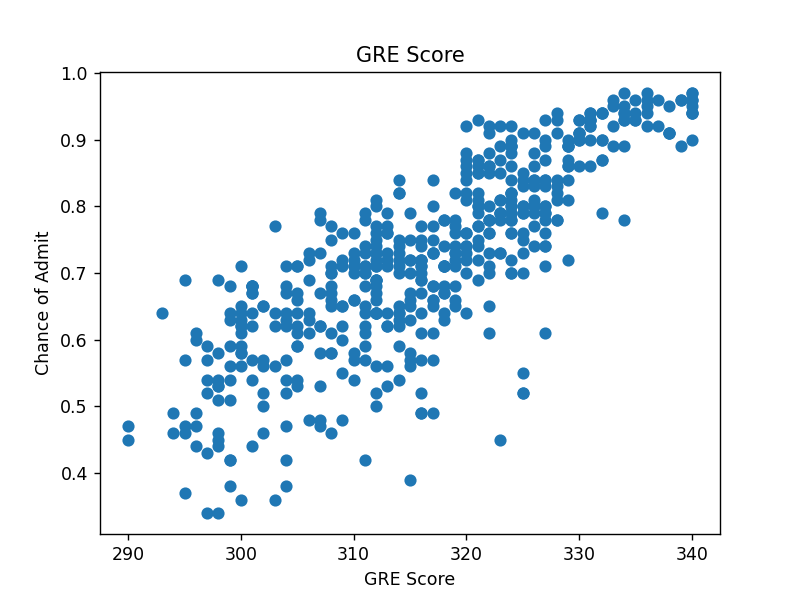

<IPython.core.display.Javascript object>


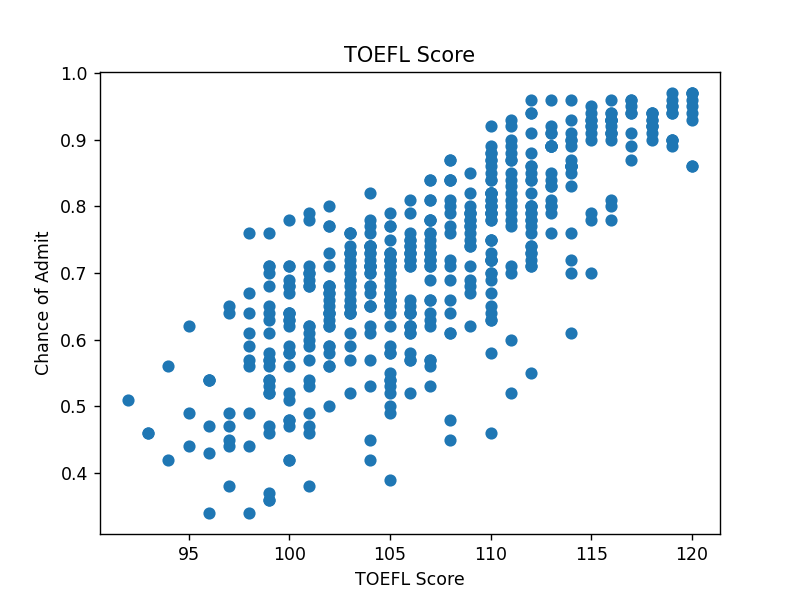

<IPython.core.display.Javascript object>


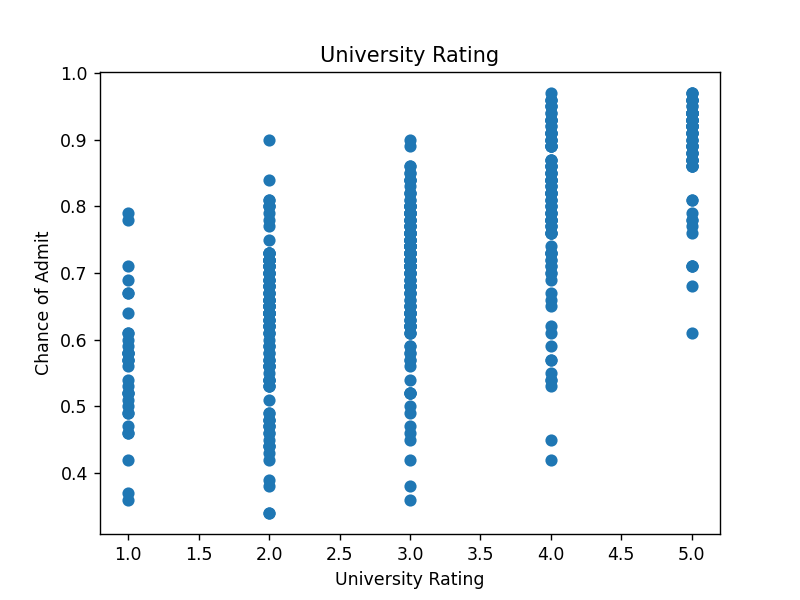

<IPython.core.display.Javascript object>


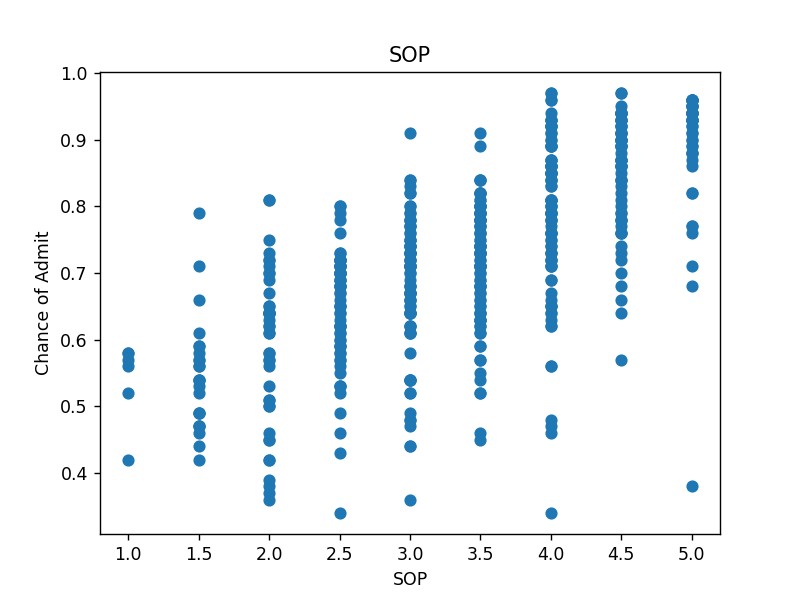

<IPython.core.display.Javascript object>


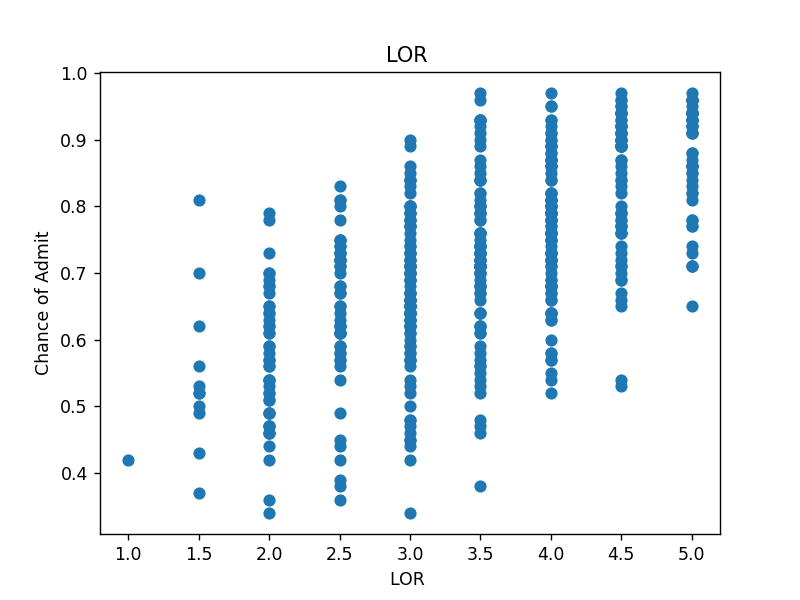

<IPython.core.display.Javascript object>


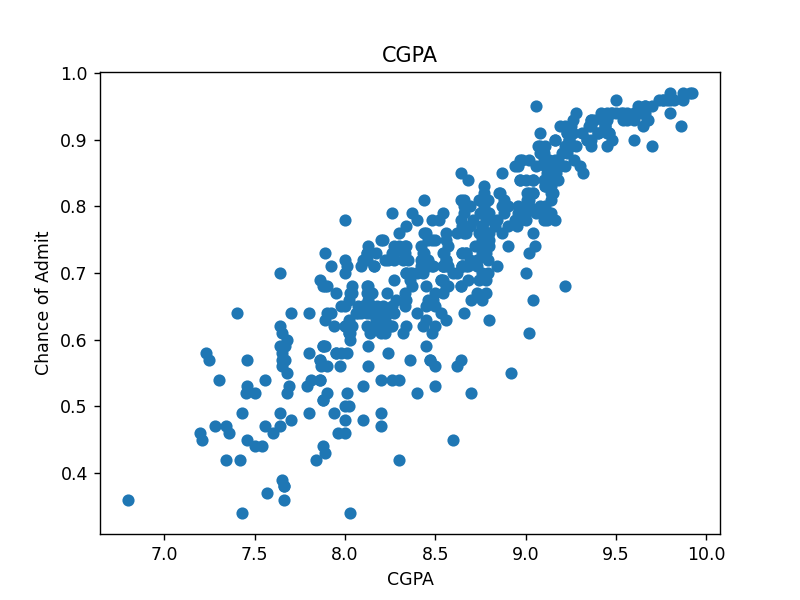

<IPython.core.display.Javascript object>


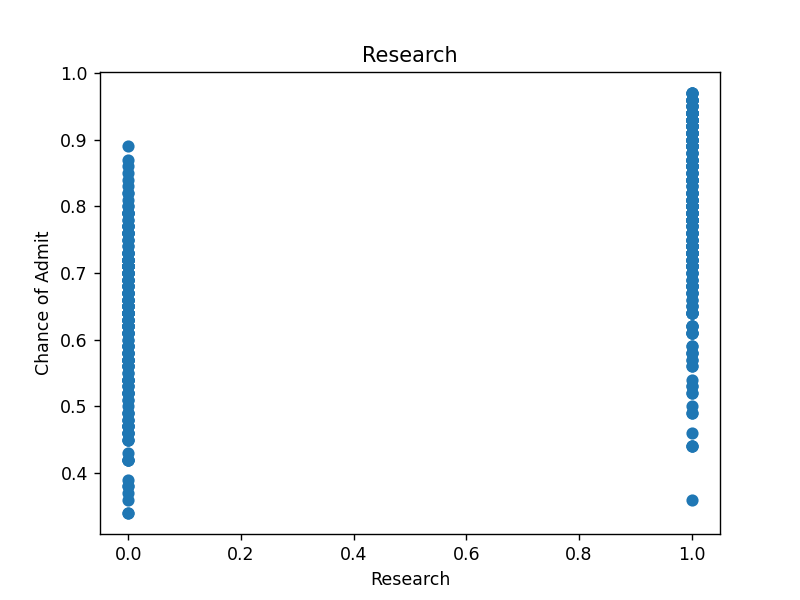

In [39]:
# mostrem atribut 0 fins a 8

for i in range(len(index)):
    if i==len(index)-1:
        break
    plt.figure()
    plt.scatter(x[:, i], y)
    plt.title(index[i])
    plt.ylabel('Chance of Admit')
    plt.xlabel(index[i])
    plt.show()


# plt.figure()
# ax = plt.scatter(x[:, 0], y)

<IPython.core.display.Javascript object>


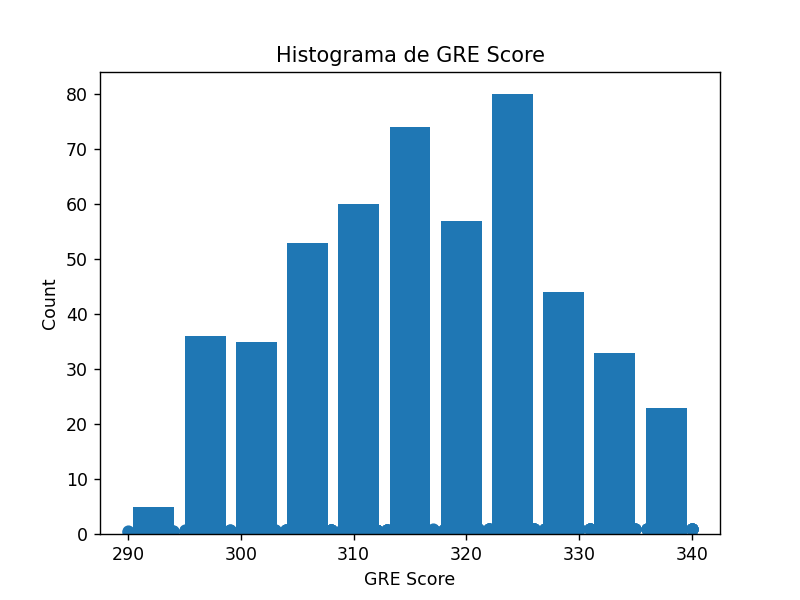

<IPython.core.display.Javascript object>


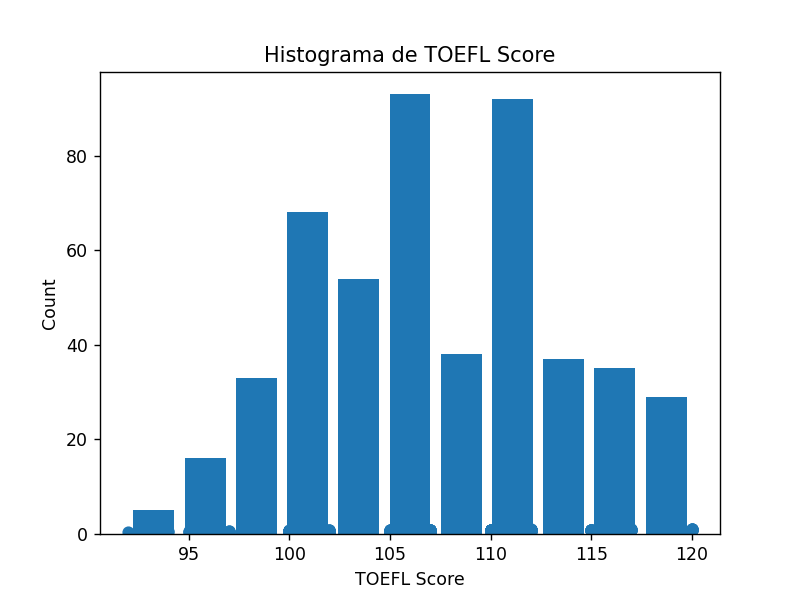

<IPython.core.display.Javascript object>


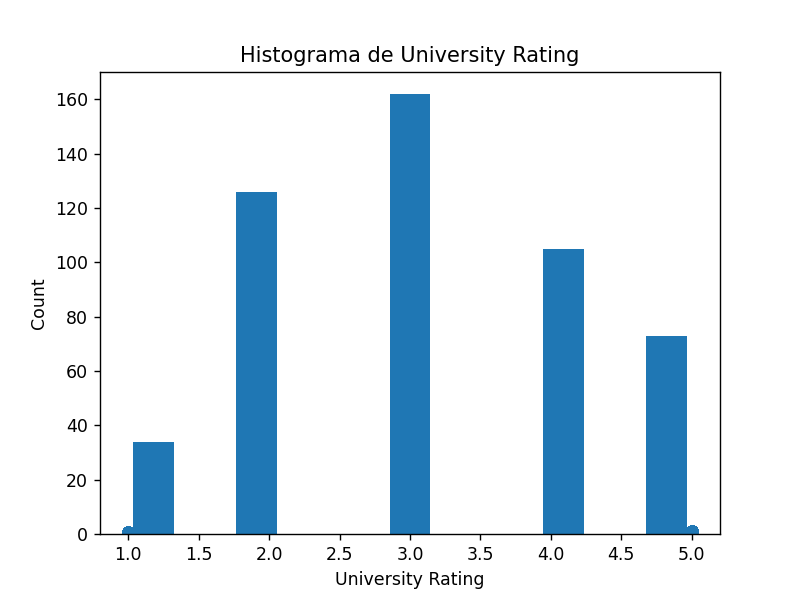

<IPython.core.display.Javascript object>


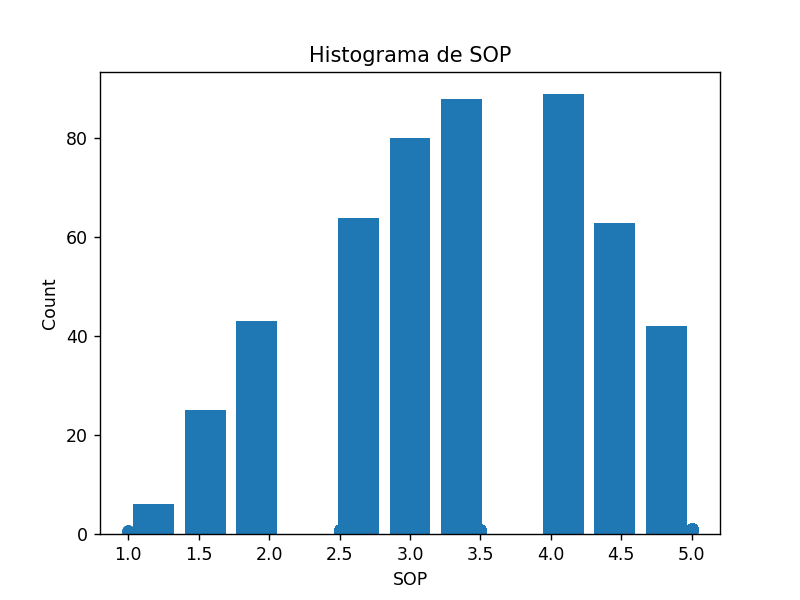

<IPython.core.display.Javascript object>


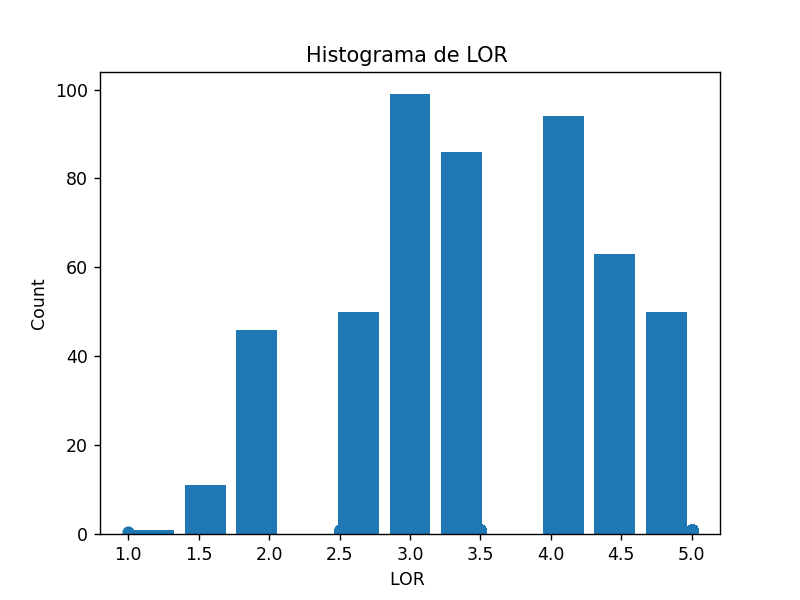

<IPython.core.display.Javascript object>


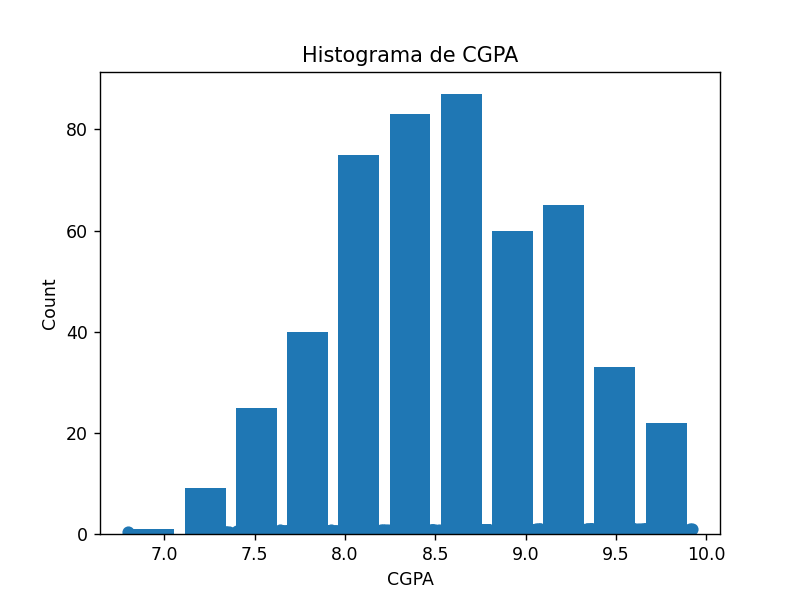

<IPython.core.display.Javascript object>


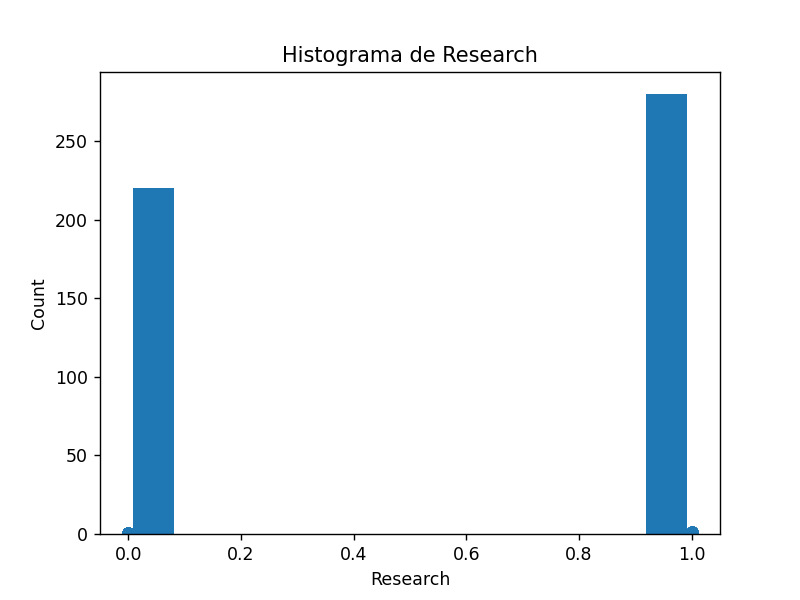

In [42]:
# plt.figure()
# plt.title("Histograma de l'atribut 0")
# plt.xlabel("Attribute Value")
# plt.ylabel("Count")
# hist = plt.hist(x[:,0], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)

for i in range(len(index)):
    if i==len(index)-1:
        break
    plt.figure()
    plt.scatter(x[:, i], y)
    plt.title("Histograma de " + index[i])
    plt.ylabel('Count')
    plt.xlabel(index[i])
    hist = plt.hist(x[:,i], bins=11, range=[np.min(x[:,i]), np.max(x[:,i])], histtype="bar", rwidth=0.8)
#     plt.show()



Aquest histograma ens permet observar si presenta una distribució Gaussiana. Per exemple, el nostre atribut 0 presenta una distribució Gaussiana. També podem estudiar la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells. Aixo ens sera util per observar quins atributs tenen més pes.

<IPython.core.display.Javascript object>


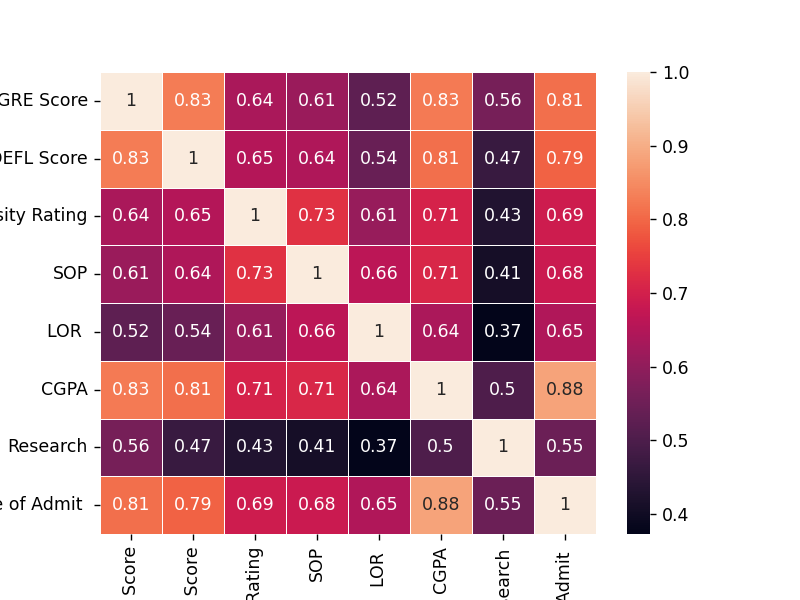

In [30]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Podem observar pel heatmap, que gariebe tots els atributs estan relacionats amb un grau per sobre del 65% amb el nostre output menys el atribut research i serial number (que és un index) que son els menys relacionats, i per tant potser un dels possibles a descartar en un futur. També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si. Pero la relació que ens interessa observar es la dels atributs amb l'ultim atribut ja que es la sortida, podent així observar quin atribut esta més relacionat amb la sortida.

<IPython.core.display.Javascript object>


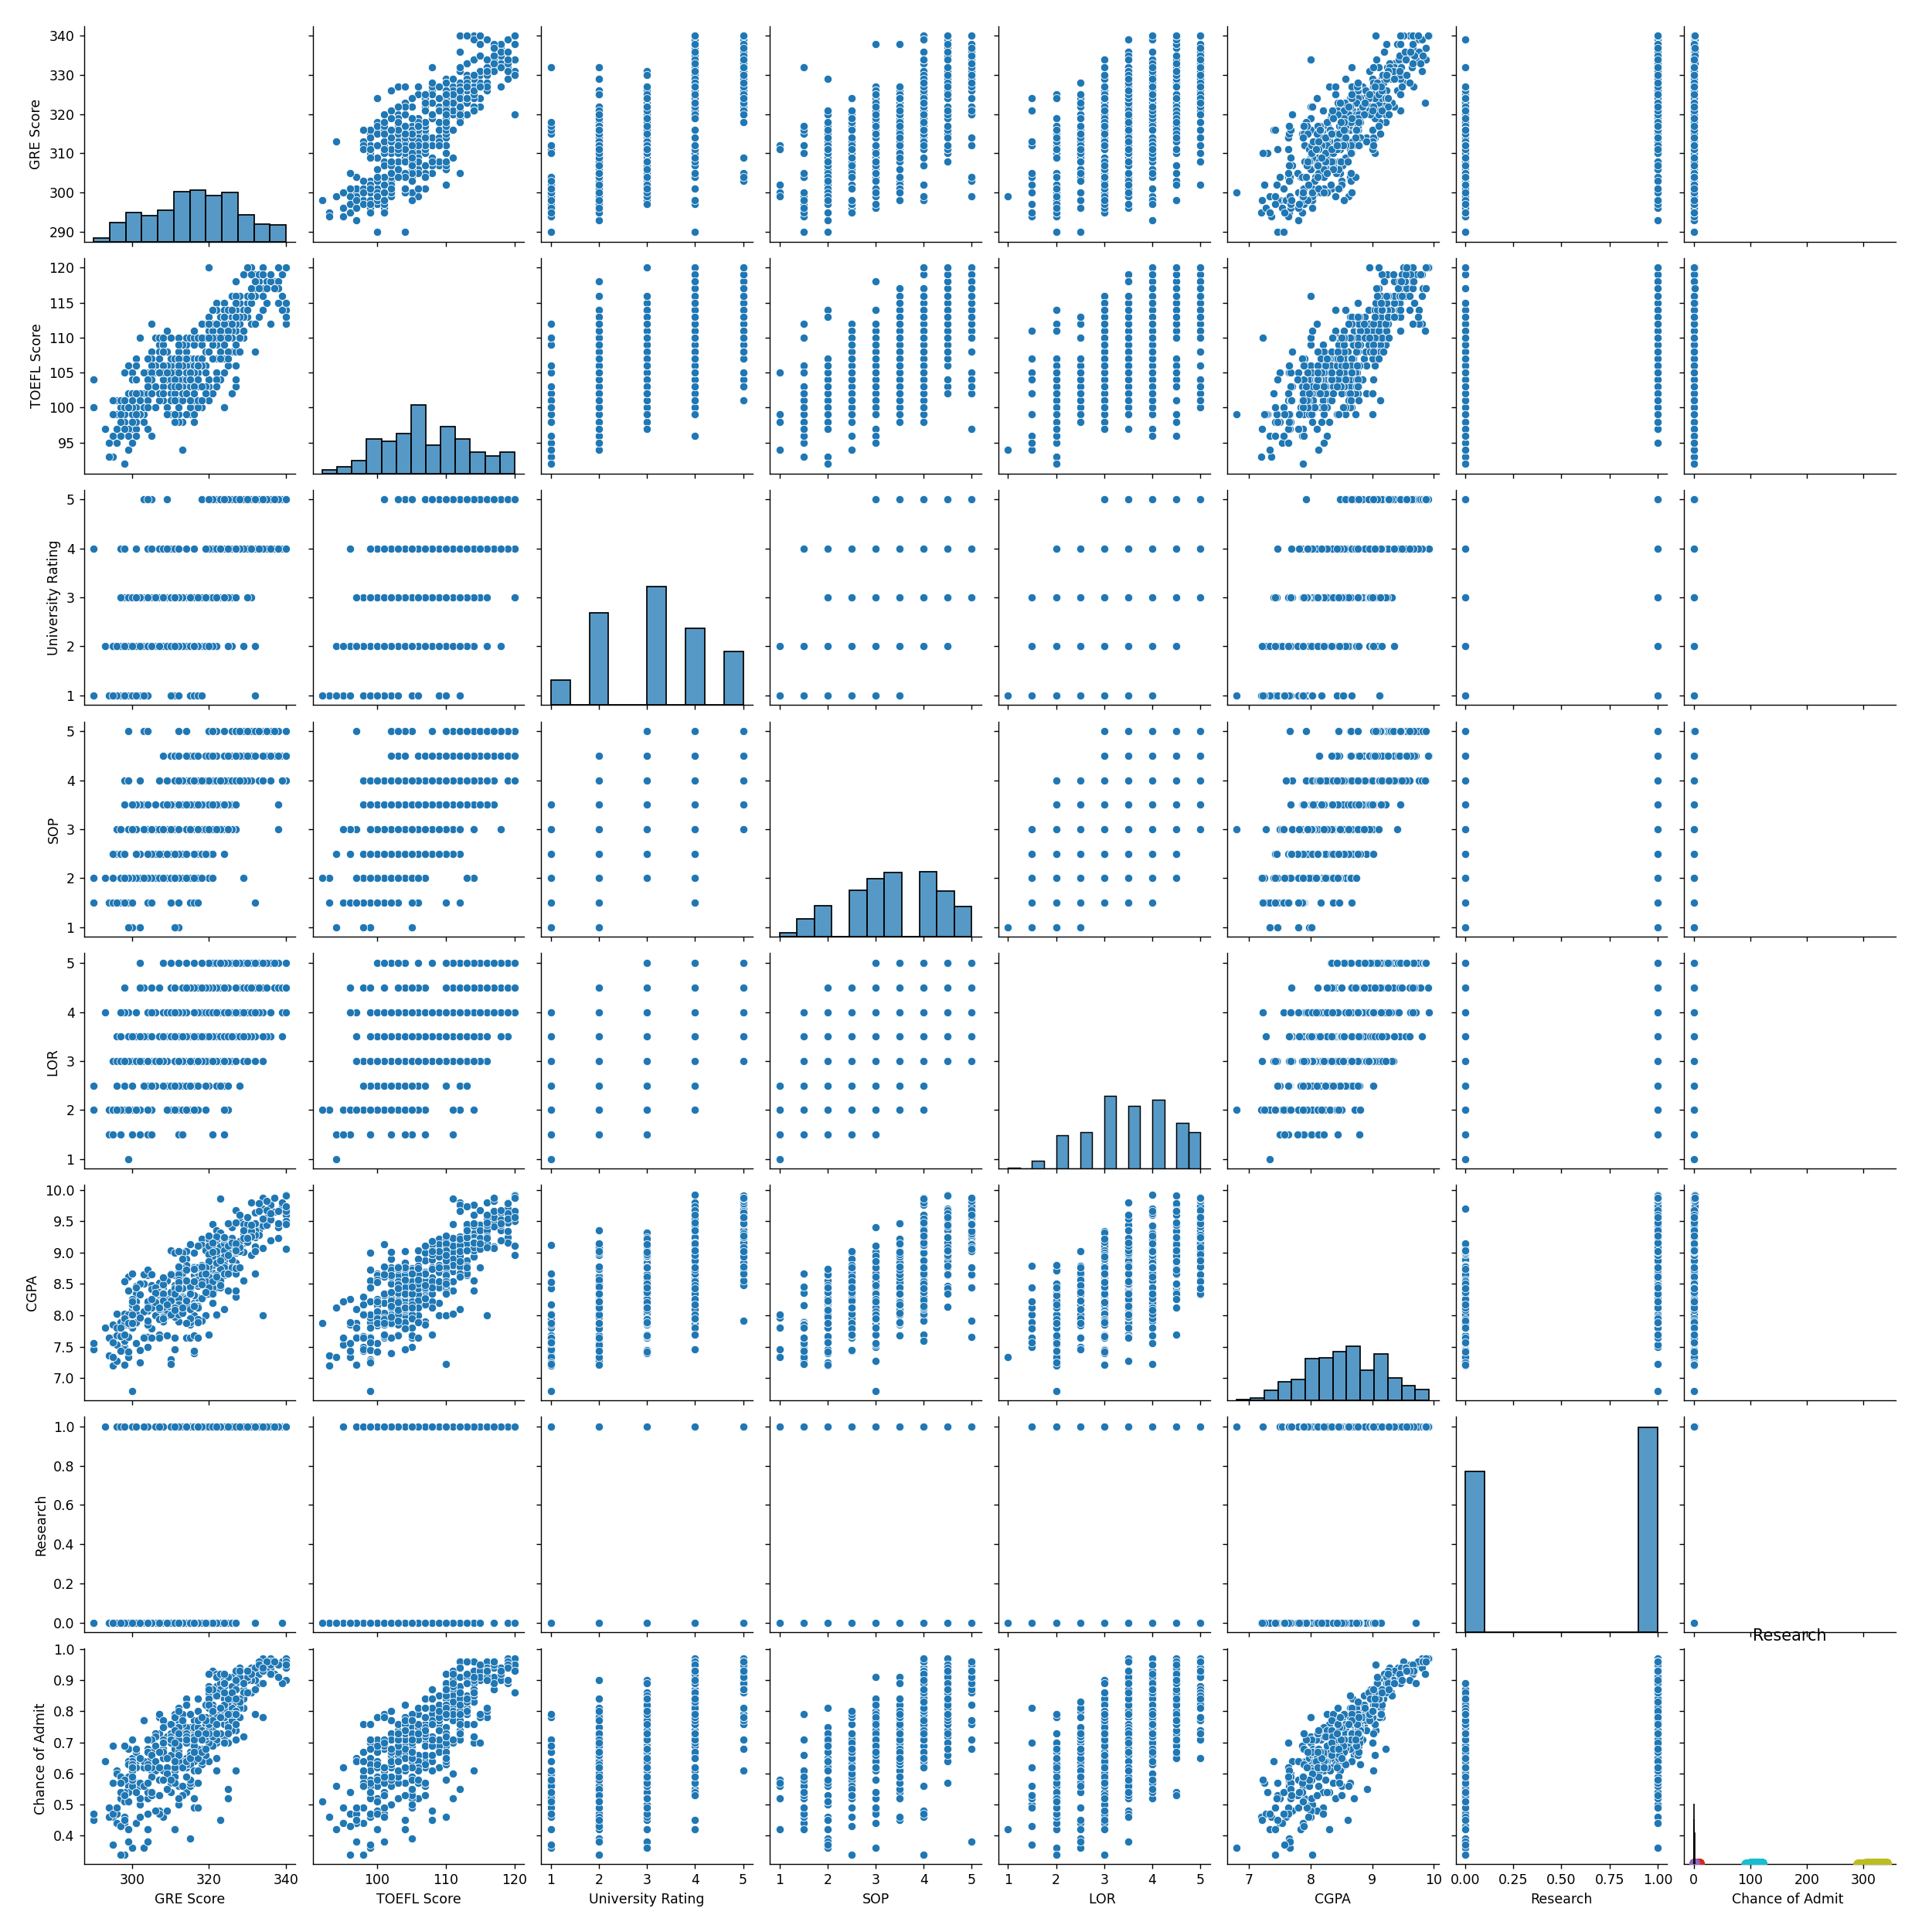

In [31]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

Així doncs ara podreu respondre a les següents preguntes:

Quin és el tipus de cada atribut?

- Serial No.: Numeros enters entre 0 i 500 
- GRE Score : Numeros enters entre 290 i 340 
- TOEFL Score : Numeros enters entre 92 i 120 
- University Rating : Numeros enters entre 1 i 5 
- SOP : Numeros enters entre 1 i 5
- LOR : Numeros enters entre 1 i 5
- CGPA : Numeros decimals entre 6.8 i 9.92
- Research : Numero binari, 0 i 1
- Chance of Admit : Percentatge entre 0 i 100% 

Quins atributs tenen una distribució Guassiana?

Podem observar per les grafiques de barres que els atributs amb distribució Gaussiana son:

- GRE Score
- TOEFL Score
- CGPA

Quin és l'atribut objectiu? Per què?
- El nostre objectiu es predir el tant percent de possibilitat d'admissió a la universitat en la India. Per tant podem dir que la nostra variable objectiu a predir sera la ultima, Chance of Admit. 

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

Per a agilitzar els càlculs es recomana utilitzar la llibreria numpy. Aquesta llibreria ens permet processar vectors sencers a la vegada de manera eficient i en paral·lel. Exemple:

In [14]:
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,1,4]) 

# podem sumar dos vectors element a element
print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
vector3 = vector1.copy()
vector3[vector2 == 1] = 5
print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE: ", mse(vector1, vector2))

Suma vector1 + vector2  [2 4 4 8]
Suma valors vector1  10
Mitjana vector1 2.5
Vector1 amb un 5 on el Vector2 te 1s  [5 2 5 4]
MSE:  1.0


Per a la regressió podeu utilitzar la llibreria sklearn:

In [15]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Primer estandaritzarem les nostres dades del dataset. Hem decidit mostrar un histograma per a cada atribut del nostre dataset amb les dades normalitzades i sense normalitzar, per entendre com afecta la normalització o estandaritzacio.

In [21]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

<IPython.core.display.Javascript object>


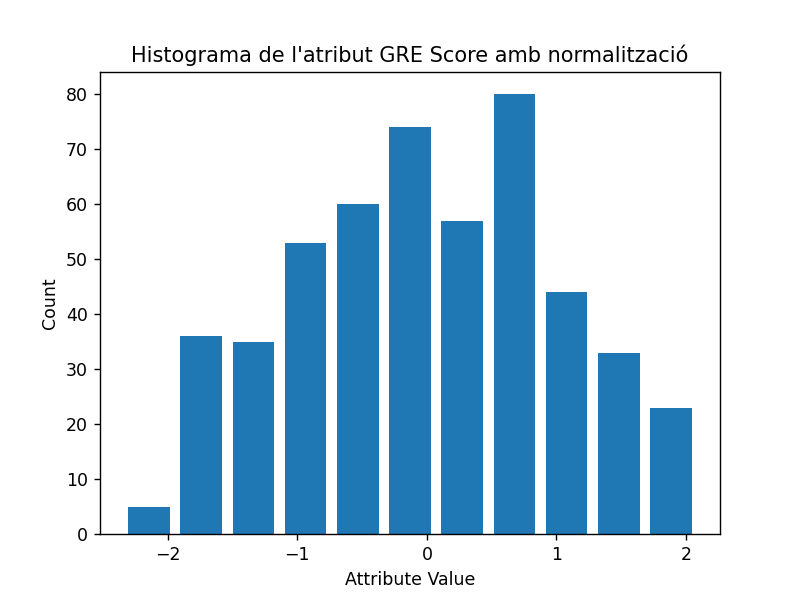

<IPython.core.display.Javascript object>


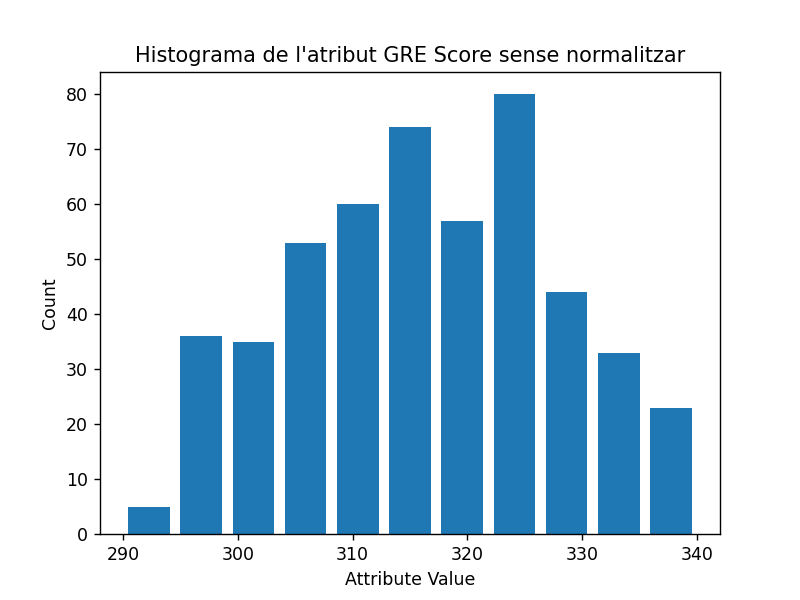

<IPython.core.display.Javascript object>


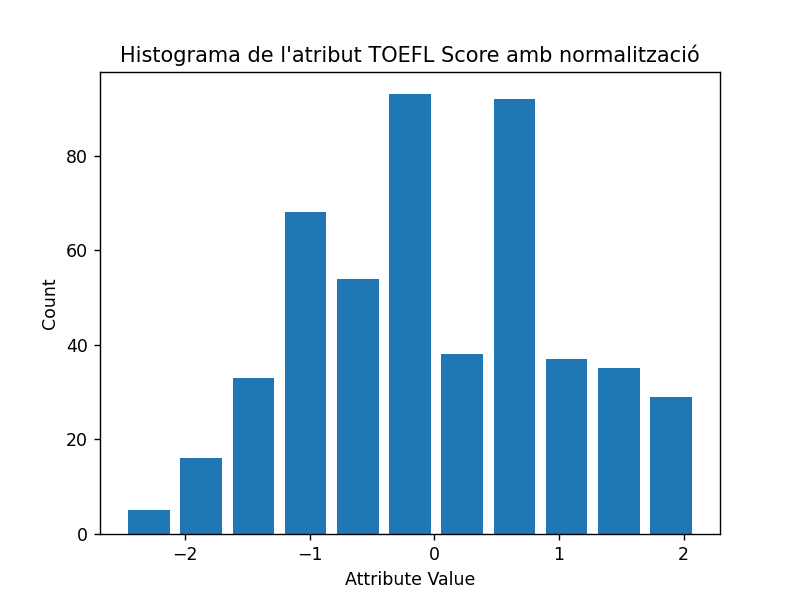

<IPython.core.display.Javascript object>


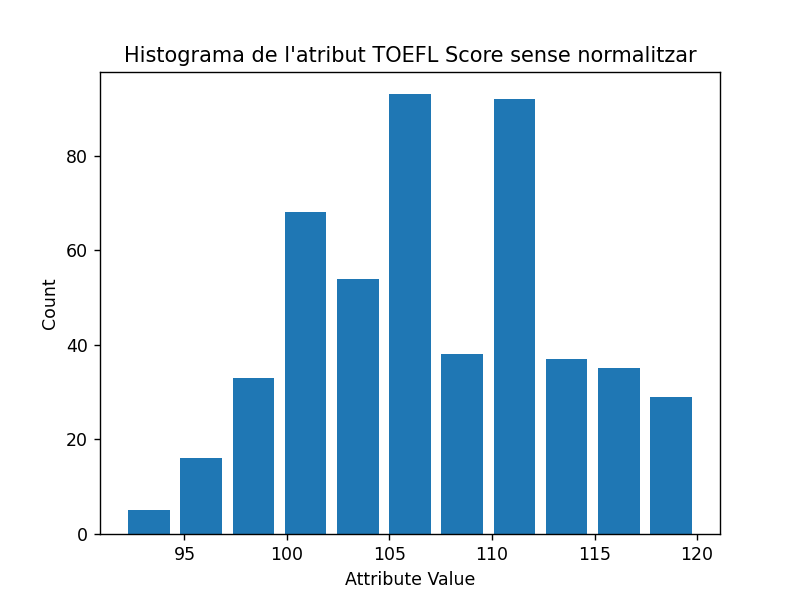

<IPython.core.display.Javascript object>


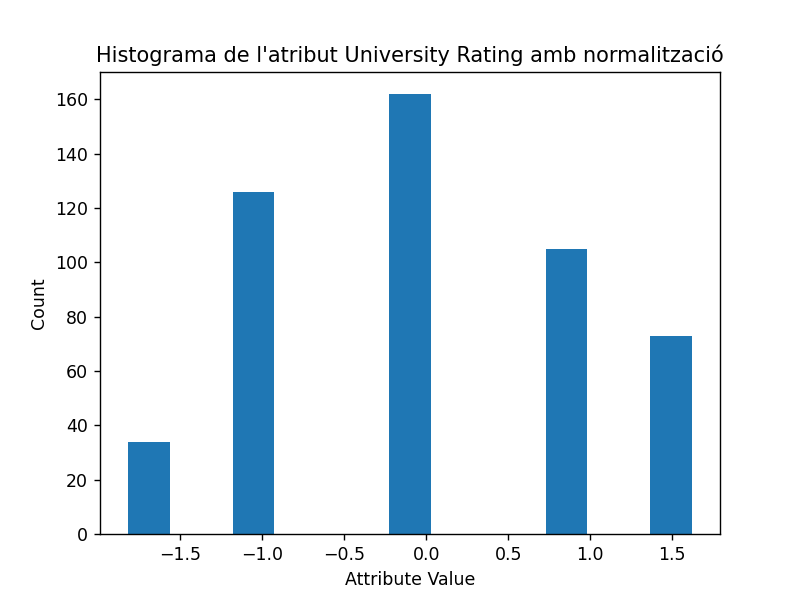

<IPython.core.display.Javascript object>


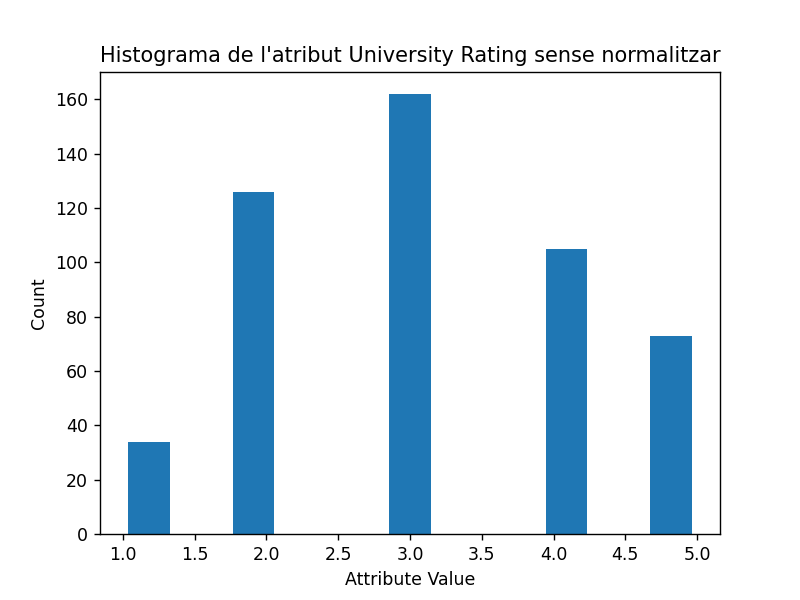

<IPython.core.display.Javascript object>


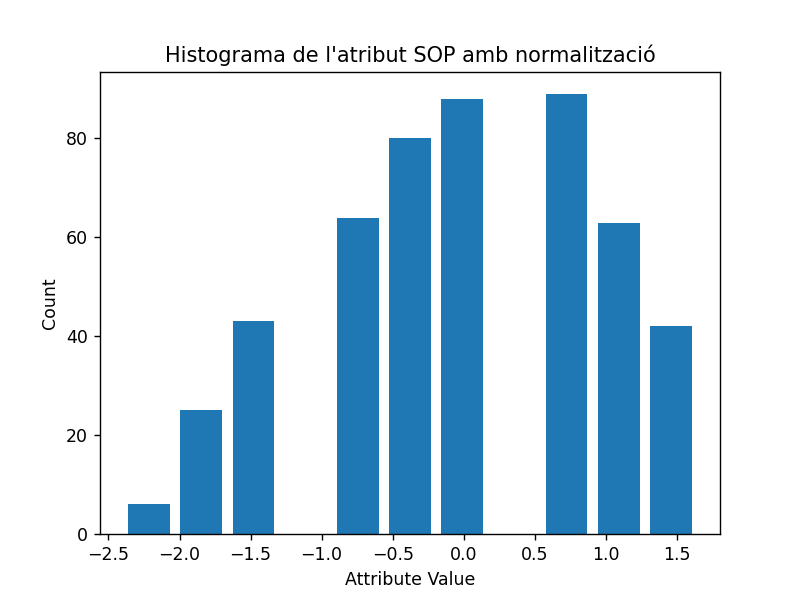

<IPython.core.display.Javascript object>


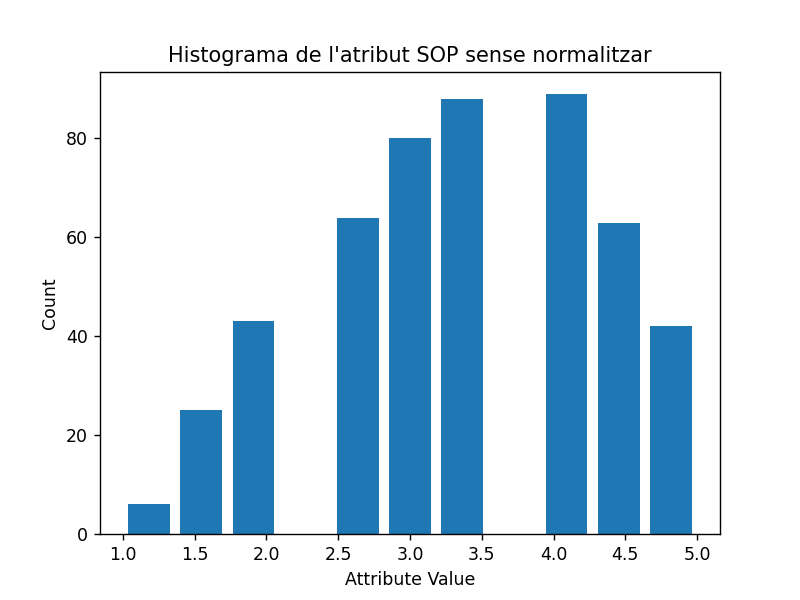

<IPython.core.display.Javascript object>


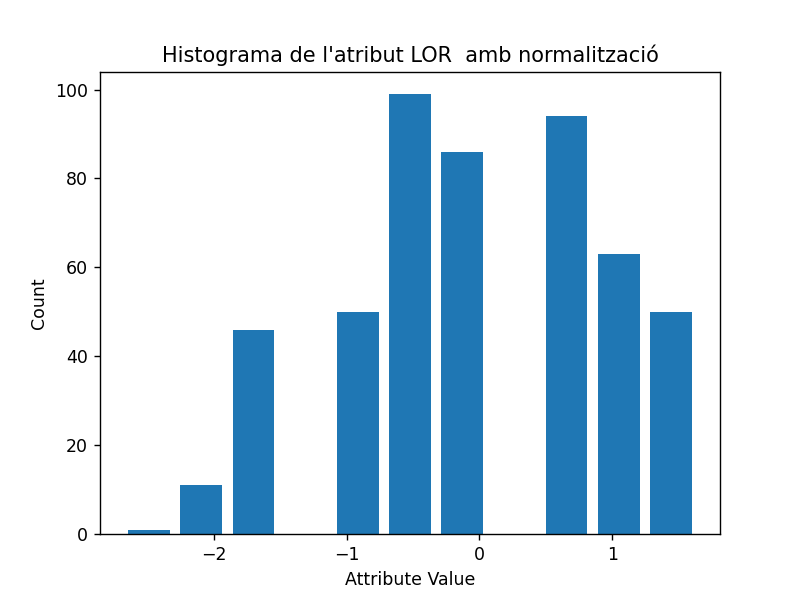

<IPython.core.display.Javascript object>


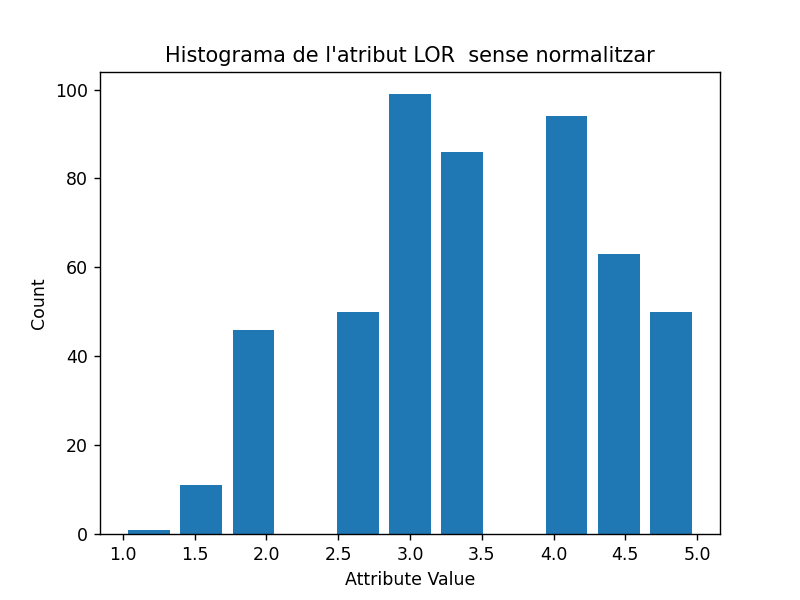

<IPython.core.display.Javascript object>


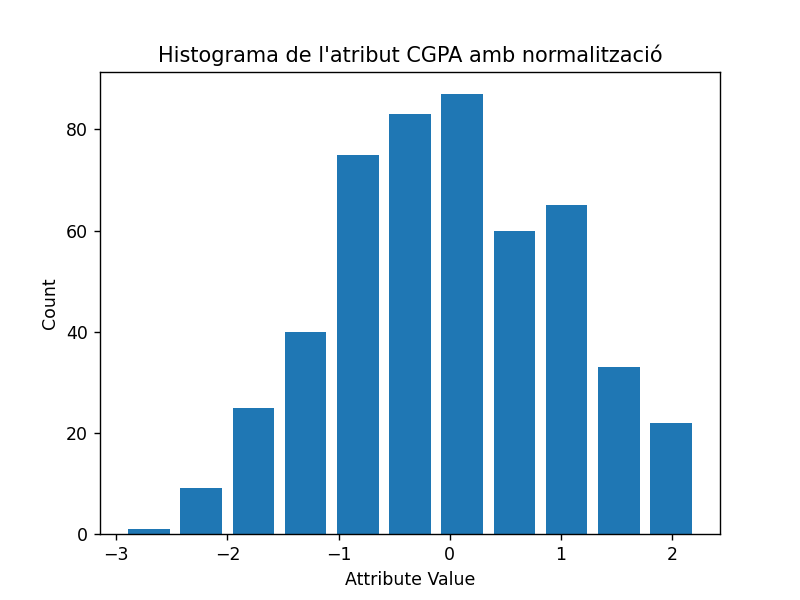

<IPython.core.display.Javascript object>


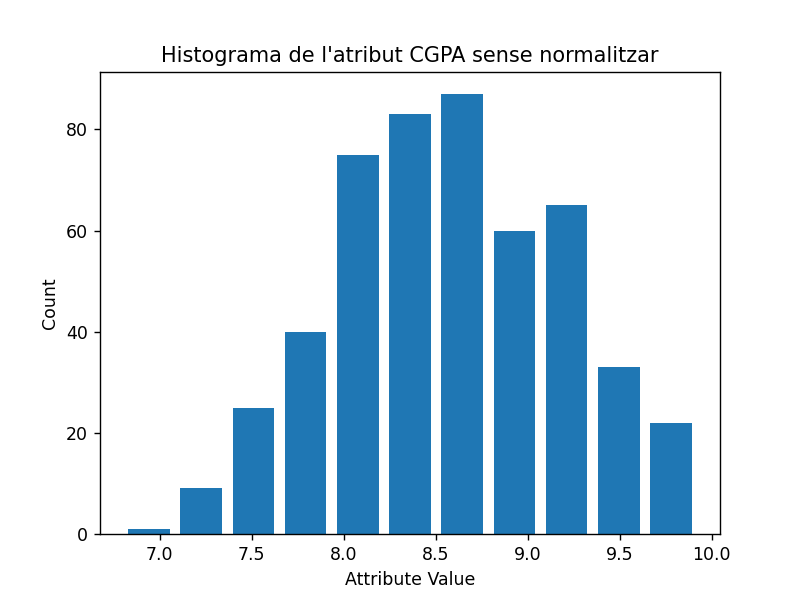

<IPython.core.display.Javascript object>


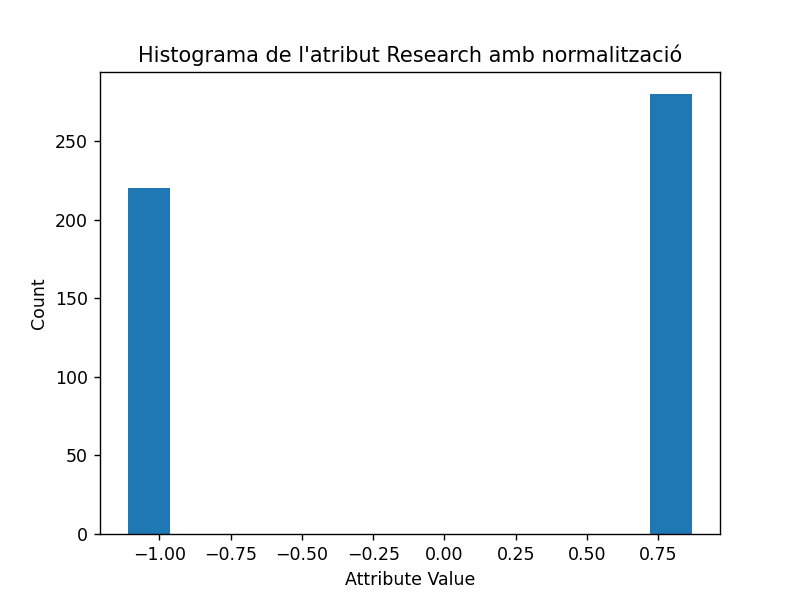

<IPython.core.display.Javascript object>


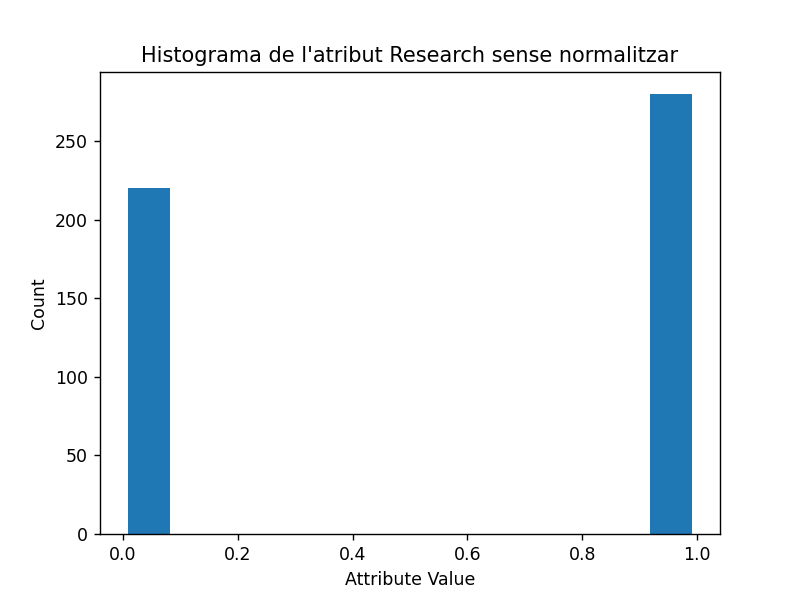

In [22]:
for i in range(x.shape[1]):
    plt.figure()
    plt.title("Histograma de l'atribut {} amb normalització".format(str(index[i])))
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    x_t = standarize(x)
    hist = plt.hist(x_t[:,i], bins=11, range=[np.min(x_t[:,i]), np.max(x_t[:,i])], histtype="bar", rwidth=0.8)

    plt.figure()
    plt.title("Histograma de l'atribut {} sense normalitzar".format(str(index[i])))
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    x_t_1 = x
    hist1 = plt.hist(x_t_1[:,i], bins=11, range=[np.min(x_t_1[:,i]), np.max(x_t_1[:,i])], histtype="bar", rwidth=0.8)

Hem fet el mateix que abans per a la regressió, primer l'entrenem amb dades sense normalitzar per a cada atribut i després  amb dades normalitzades.

<IPython.core.display.Javascript object>


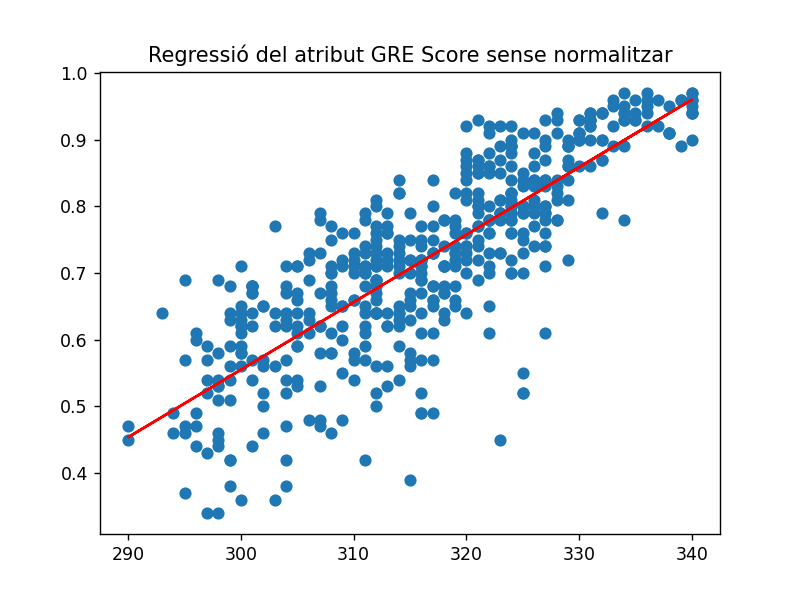

Mean squeared error:  0.006825702319892391
R2 score:  0.6566681523957092


<IPython.core.display.Javascript object>


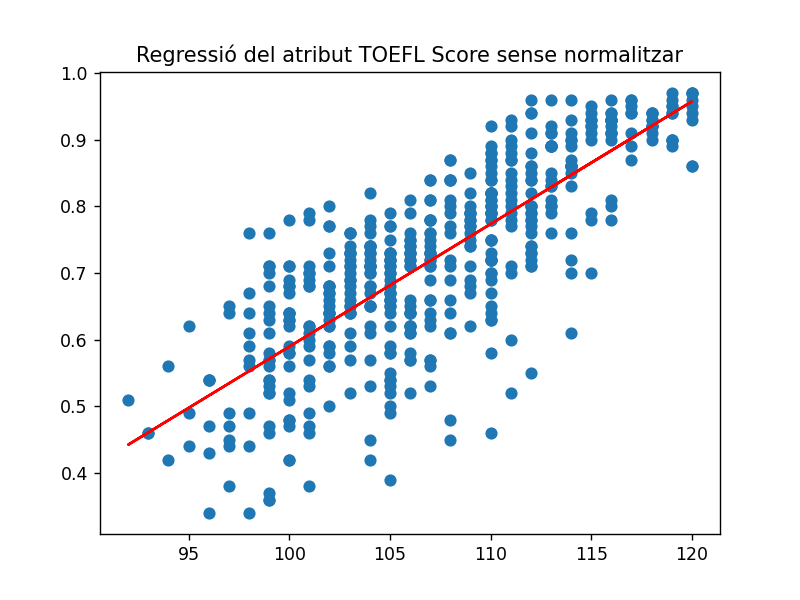

Mean squeared error:  0.007403110716558108
R2 score:  0.6276245928675231


<IPython.core.display.Javascript object>


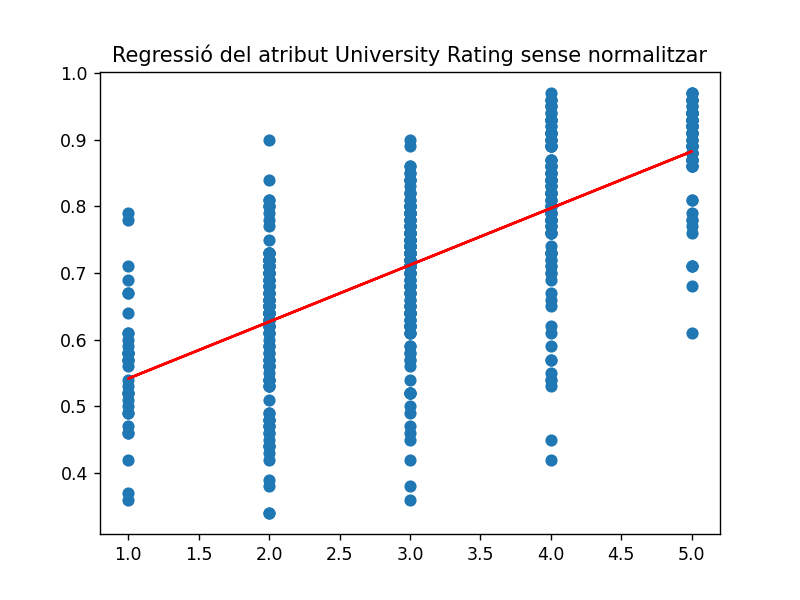

Mean squeared error:  0.010411904712629233
R2 score:  0.4762826864498869


<IPython.core.display.Javascript object>


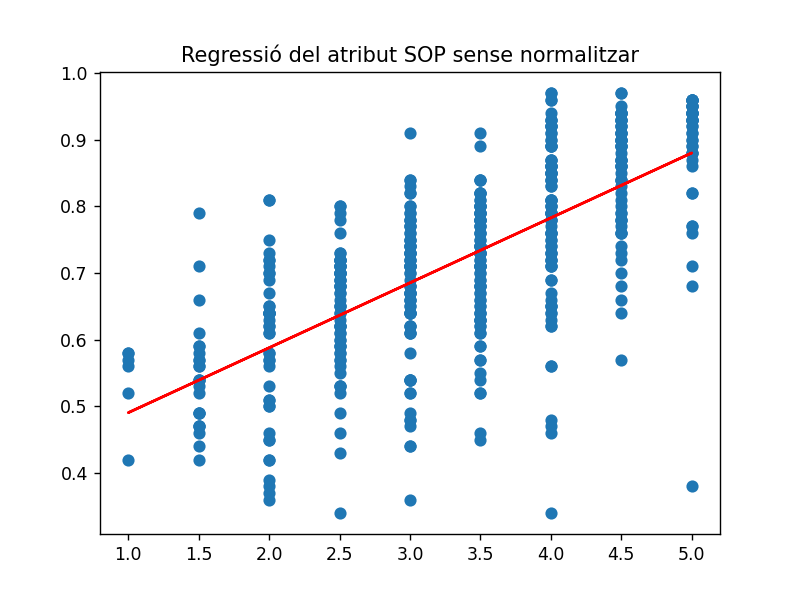

Mean squeared error:  0.010575720344772702
R2 score:  0.4680427836509661


<IPython.core.display.Javascript object>


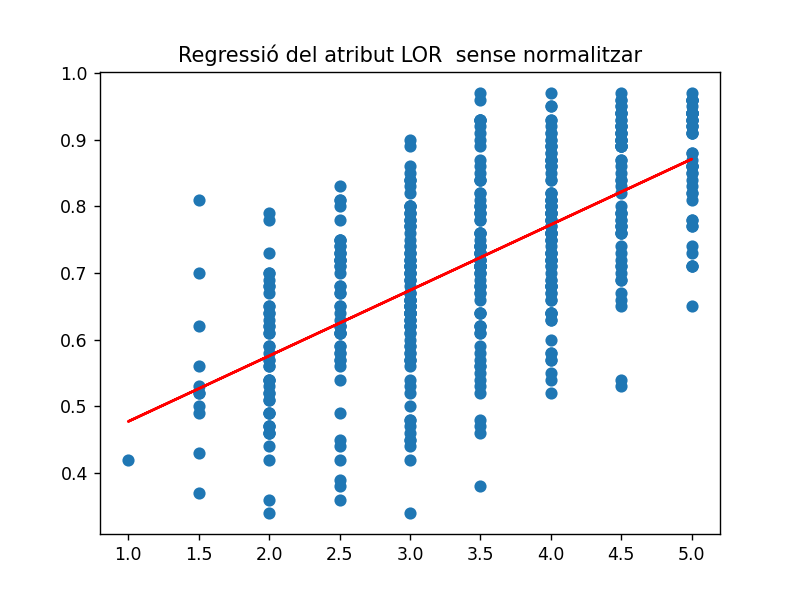

Mean squeared error:  0.011600523035201184
R2 score:  0.4164953553212457


<IPython.core.display.Javascript object>


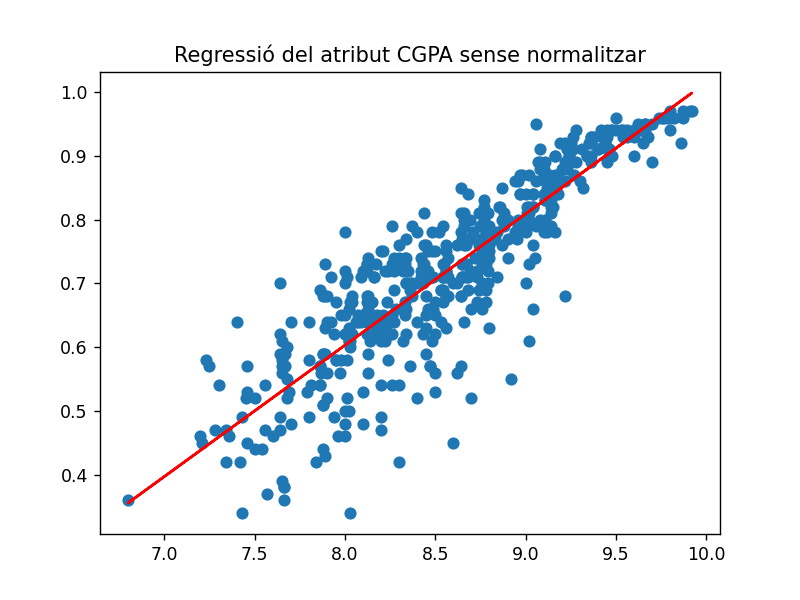

Mean squeared error:  0.004400570156519553
R2 score:  0.7786519523497208


<IPython.core.display.Javascript object>


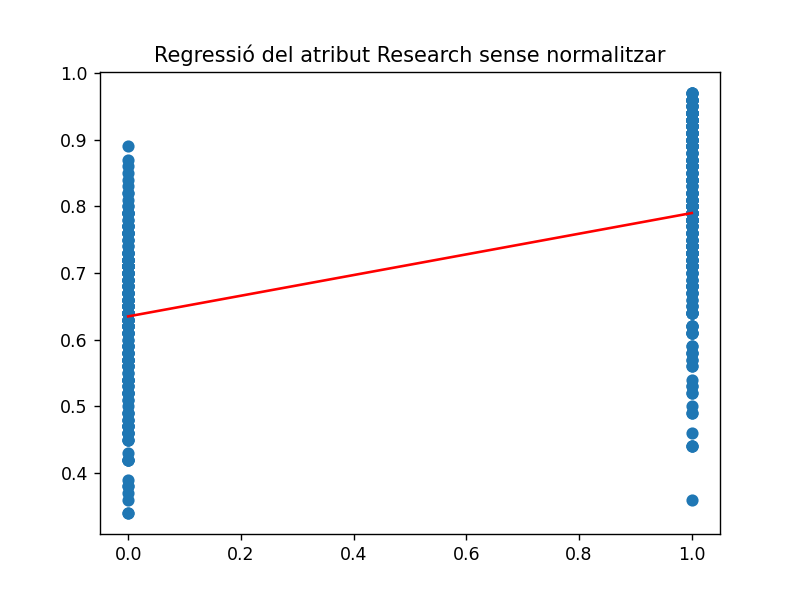

Mean squeared error:  0.013956795649350649
R2 score:  0.2979751808158796


In [18]:
from sklearn.metrics import r2_score

for i in range(x.shape[1]):
    atribut_index = i 
    # Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
    # En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
    atribut1 = x[:,atribut_index].reshape(x.shape[0], 1) 
    regr = regression(atribut1, y) 
    predicted = regr.predict(atribut1)

    # Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
    plt.figure()
    plt.title("Regressió del atribut {} sense normalitzar".format(index[atribut_index]))
    ax = plt.scatter(x[:,atribut_index], y)
    plt.plot(atribut1[:,0], predicted, 'r')

    # Mostrem l'error (MSE i R2)
    MSE = mse(y, predicted)
    r2 = r2_score(y, predicted)

    print("Mean squeared error: ", MSE)
    print("R2 score: ", r2)


In [25]:
from sklearn.metrics import r2_score

for i in range(x.shape[1]):
    atribut_index = i 
    # Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
    # En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
    atribut1 = x[:,atribut_index].reshape(x.shape[0], 1) 
    
    atribut1 = standarize(atribut1)
    y = standarize(y)
    
    regr = regression(atribut1, y) 
    predicted = regr.predict(atribut1)

    # Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
    plt.figure()
    plt.title("Regressió del atribut {} sense normalitzar".format(index[atribut_index]))
    ax = plt.scatter(x[:,atribut_index], y)
    plt.plot(atribut1[:,0], predicted, 'r')

    # Mostrem l'error (MSE i R2)
    MSE = mse(y, predicted)
    r2 = r2_score(y, predicted)

    print("Mean squeared error: ", MSE)
    print("R2 score: ", r2)

IndexError: invalid index to scalar variable.

Un cop mostrats de manera adient, (en forma de taula, i/o de gràfics si la dimensionalitat ho permet) els resultats aconseguits amb la regressió, avaluarem de manera independent la idonietat de cadascun dels atributs.

In [26]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    
    print("Error en atribut %s (%d): %f" %(str(index[i]), i, error))
    print("R2 score en atribut %s (%d): %f" %(str(index[i]), i, r2))
    print("---")

Error en atribut GRE Score (0): 0.005586
R2 score en atribut GRE Score (0): 0.708692
---
Error en atribut TOEFL Score (1): 0.007455
R2 score en atribut TOEFL Score (1): 0.611231
---
Error en atribut University Rating (2): 0.009873
R2 score en atribut University Rating (2): 0.485116
---
Error en atribut SOP (3): 0.010137
R2 score en atribut SOP (3): 0.471322
---
Error en atribut LOR  (4): 0.010803
R2 score en atribut LOR  (4): 0.436586
---
Error en atribut CGPA (5): 0.003579
R2 score en atribut CGPA (5): 0.813328
---
Error en atribut Research (6): 0.011405
R2 score en atribut Research (6): 0.405198
---


Ara observarem com canvia un cop hem estandaritzat les dades. Per estandartizar, cridem a la funció anterior standarize, i li pasem cada atribut del dataset, es a dir les dades de train i les de validació d'aquell atribut.

In [27]:
for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    x_t = standarize(x_t) #estandaratizem les dades de train del atribut i 
    x_v = standarize(x_v) #estandaratizem les dades de validacio del atribut i 
    
    
    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    
    print("Error en atribut %s (%d): %f" %(str(index[i]), i, error))
    print("R2 score en atribut %s (%d): %f" %(str(index[i]), i, r2))
    print("---")

Error en atribut GRE Score (0): 0.005503
R2 score en atribut GRE Score (0): 0.713035
---
Error en atribut TOEFL Score (1): 0.007435
R2 score en atribut TOEFL Score (1): 0.612267
---
Error en atribut University Rating (2): 0.009865
R2 score en atribut University Rating (2): 0.485551
---
Error en atribut SOP (3): 0.010129
R2 score en atribut SOP (3): 0.471765
---
Error en atribut LOR  (4): 0.010806
R2 score en atribut LOR  (4): 0.436454
---
Error en atribut CGPA (5): 0.003500
R2 score en atribut CGPA (5): 0.817484
---
Error en atribut Research (6): 0.011166
R2 score en atribut Research (6): 0.417696
---


Ara comprovarem com canvia si escollim de primera ma les variables que em trobat que presenten més correlació aixi com una distrubició Gaussiana:

In [28]:
selected_variables_index = [0,1,2,5]
for i in selected_variables_index:
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    x_t = standarize(x_t) #estandaratizem les dades de train del atribut i 
    x_v = standarize(x_v) #estandaratizem les dades de validacio del atribut i 
    
    
    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    
    print("Error en atribut %s (%d): %f" %(str(index[i]), i, error))
    print("R2 score en atribut %s (%d): %f" %(str(index[i]), i, r2))
    print("---")

Error en atribut GRE Score (0): 0.005503
R2 score en atribut GRE Score (0): 0.713035
---
Error en atribut TOEFL Score (1): 0.007435
R2 score en atribut TOEFL Score (1): 0.612267
---
Error en atribut University Rating (2): 0.009865
R2 score en atribut University Rating (2): 0.485551
---
Error en atribut CGPA (5): 0.003500
R2 score en atribut CGPA (5): 0.817484
---


Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat aplicant un Principal Component Analysis (PCA) i quedar-se amb els primers 2 o 3 components, obtenint unes dades que (ara sí) poden ser visualitzables en el nou espai. Existeixen altres embeddings de baixa dimensionalitat on poder visualitzar les dades?
Hem trobat algún exemple com:
 - word2vec de Google

Així es podrà contestar a aquestes **preguntes**:

1. Quin són els atributs més importants per fer una bona predicció?

    Aquells que tenen una variança més elevada.

2. Amb quin atribut s'assoleix un MSE menor?
    
    Hem observat que el atribut CGPA presenta el MSE més petit comparant amb els altres atributs (amb dades normalitzades i sense normalitzar).
    
3. Quina correlació hi ha entre els atributs de la vostra base de dades?

    Tots aquells atributs referents a un examen o notes obtingudes en el curs (el TOEFL, el GRE Score i CGPA) estan àmpliament correlacionats, el qual presenta sentit, ja que son factors importants.

4. Com influeix la normalització en la regressió?

    

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?

6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?
    Es redueix a 2 o 3 dimensions perque són els espais representables. en alguns casos es poden representar fins a 4 dimensions pero generalment només treballarem amb 2 o 3 dimensions


# Apartat (A): El descens del gradient  

En aquest exercici, es tracta d'implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="exemple/images/gradient_descent.png">

Per a la implementació us podeu basar en el següent esquelet:

In [23]:
class Regressor(object):
    def __init__(self, w0, w1, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        
        pass
    
    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        pass
    
    def train(self, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        pass

L'últim pas serà validar el regressor trobat pel descent del gradient desenvolupat en aquest apartat visualment, aplicat a un model de recta i un model de pla. Per a això, caldrà considerar el millor atribut identificat en el primer punt de l'anterior entrega per visualitzar la línia regressora en 2D (podeu mostrar dades 2d amb la funció scatter). Després, dos dels atributs identificats a l'últim punt del primer exercici per visualitzar el pla regressor en 3D (En el cas 3D l’scatter s’ha de fer sobre una figura amb projecció 3D).

In [ ]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = np.random.random((100, 2))
y_val = np.random.random((100, 1))
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
